# PCA for Data Visualization and Dimensionality Reduction

## 1. Loading data

In [6]:
# MNIST dataset downloaded from Kaggle : https://www.kaggle.com/c/digit-recognizer/data

# inporting necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load data from csv into pandas dataframe
mnist_df = pd.read_csv('train.csv')

# display first few rows
mnist_df.head() 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# save the labels into a variable y
y = mnist_df['label']

# Drop the label feature and store the pixel data in X
X = mnist_df.drop("label", axis = 1)

In [8]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


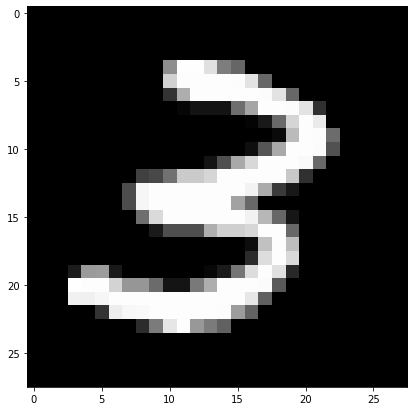

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
class label: 3


In [9]:
# display a random number from datset
plt.figure(figsize = (7,7))
idx = 4501
grid_data = X.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = 'gray')
plt.show()

# print the corresponding class label
print("- "*50)
print("class label:", y[idx])

## 2. Data visualization using PCA

### 2.1 Implementing PCA from scratch 

In [10]:
# Data-preprocessing: Standardizing the data with standard scaler
from sklearn.preprocessing import StandardScaler

X_std = StandardScaler().fit_transform(X)
print(X_std.shape)

(42000, 784)


In [11]:
# find the co-variance matrix:  (A^T * A)/n
# matrix multiplication using numpy
covar_matrix = np.matmul(X_std.T , X_std)/X_std.shape[1]
print ( "The shape of covariance matrix = ", covar_matrix.shape)

The shape of covariance matrix =  (784, 784)


In [13]:
# find top two eigen-values and corresponding eigen-vectors for projection on a 2-D space

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to high value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues

values, vectors = eigh(covar_matrix, eigvals = (782,783))

print("Shape of eigen vectors: ",vectors.shape)

Shape of eigen vectors:  (784, 2)


> Since, the method 'eigh' returns eigen vectors in ascending order i.e.low to high , 

> 782nd eigen vector(vectors[0]) represents 2nd Principal component 

> 783rd eigen vector(vectors[1]) represents to 1st Principal component


In [38]:
# projecting the original data sample on the plane formed by two principal eigen vectors by vector-vector multiplication

new_coordinates = np.matmul(vectors.T, X_std.T) # premultiplication eigen-vect x std-dataset
print ("resultant new data points' shape ", vectors.T.shape, "X", X_std.T.shape," = ", new_coordinates.shape)

resultant new data points' shape  (2, 784) X (784, 42000)  =  (2, 42000)


> We transform the n x d dimension original standardized dataset(i.e.X_std) using the projection matrix(i.e.top eigen vectors matrix) to obtain a new n x k matrix. (Here k = 2 in our case as we have taken top 2 eigen vectors)

In [39]:
# appending class label to the 2d projected data 
new_coordinates = np.vstack((new_coordinates, y)).T

# creating a new data frame for ploting the labeled points.
new_df = pd.DataFrame(data = new_coordinates, columns = ("2nd_principal", "1st_principal", "label"))
print(new_df.head())

   2nd_principal  1st_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


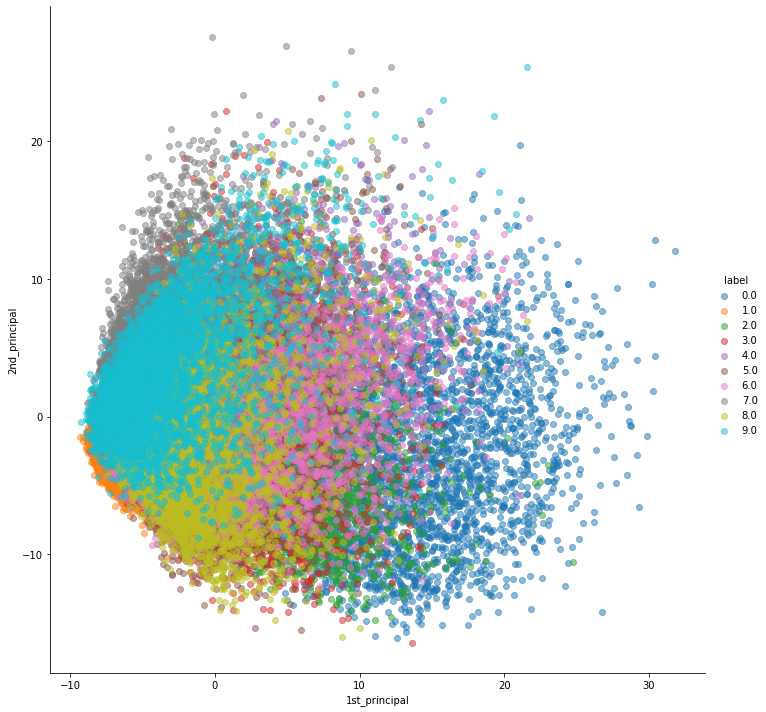

In [49]:
# ploting the 2d data points with seaborn

sns.lmplot(x = '1st_principal', y = '2nd_principal', data = new_df, 
           hue = 'label', legend = True, legend_out = True, height = 10,
           fit_reg = False, scatter_kws = {'alpha': 0.5})
plt.show()

> Note that PCA is like an unsupervised technique and doesn't need class-labels during computation. We include the class labels for visualization purpose or furthur implementing ML algo on this new transformed dataset

### 2.2 Implementing PCA directly using scikit-learn 

In [53]:
# importing and initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

# configuring the parameters
pca.n_components = 2
pca_data = pca.fit_transform(X_std) # standardized data

# print the reduced dimension shape
print("shape of transformed dataset = ", pca_data.shape)

shape of transformed dataset =  (42000, 2)


In [54]:
print(y.shape)

(42000,)


In [56]:
# attaching the label for each 2-d data point 
pca_data = np.hstack((pca_data, y.values.reshape(-1,1))) # a different way to stack columns

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data = pca_data, columns = ("1st_principal", "2nd_principal", "label"))
print(pca_df.head())

   1st_principal  2nd_principal  label
0      -5.140565      -5.227305    1.0
1      19.292284       6.032485    0.0
2      -7.644453      -1.705375    1.0
3      -0.474230       5.835419    4.0
4      26.559559       6.024912    0.0


In [ ]:
'''
# plotting with seaborn facetgrid
sns.FacetGrid(pca_df, hue="label", size=10).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()
'''

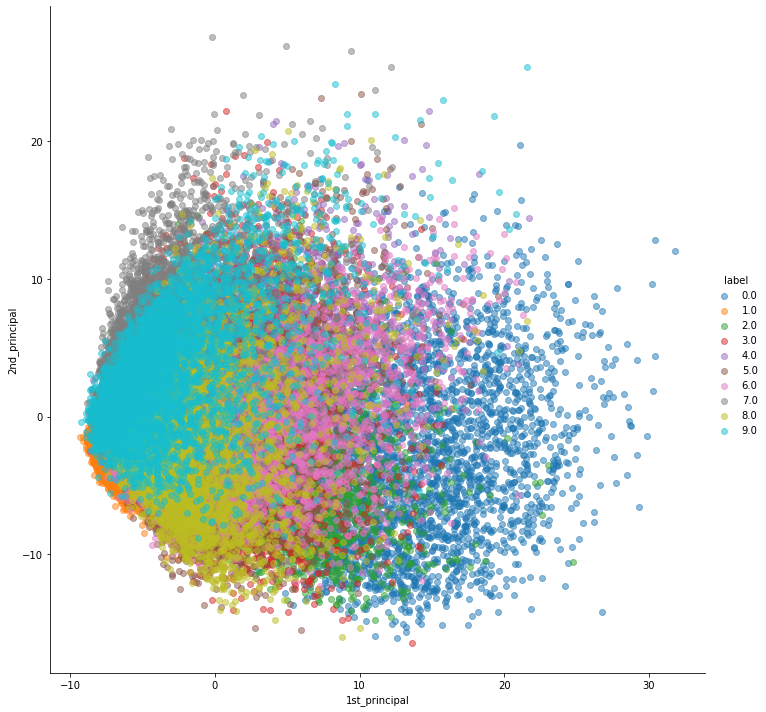

In [57]:
# ploting the 2d data points with seaborn

sns.lmplot(x = '1st_principal', y = '2nd_principal', data = pca_df, 
           hue = 'label', legend = True, legend_out = True, height = 10,
           fit_reg = False, scatter_kws = {'alpha': 0.5})
plt.show()